<html>
<h1  align="center"> Modelo KNN
    <hr>
    <img align="center;" style="background-color:
#253bff"; color:"#ff5d25";" src="https://www.iberdrola.com/documents/20125/40921/machine_learning_746x419.jpg/15ff7571-4cfc-d9f0-5ef4-9c2e9306ad88?t=1627968463400"; width="30%"; height="20%">

</h1>
</html>

<a id="section_knn"></a>
##  KNN

KNN es uno de los algoritmos más sencillos de _machine learning_. La famosa frase "dime con quién andas y te diré quién eres" tal vez sea la mejor explicación informal del algoritmo. Básicamente, KNN se encarga de memorizar la ubicación de cada muestra del conjunto de entrenamiento de acuerdo a los valores de sus _features_. Cuando recibe un dato nuevo, lo ubica en la posición del espacio que le corresponde según sus características y encuentra los _k_ vecinos más cercanos (_k_ es un hiperparámetro del modelo que define cuántos vecinos se van a considerar al momento de hacer las predicciones). Estos vecinos o puntos próximos son las muestras del conjunto de entrenamiento que resultan más similares a la observación que queremos clasificar. Una vez que se identificaron los _k_ vecinos más cercanos, cada uno de ellos aporta un "voto" a la clase a la que corresponde. La predicción queda determinada por la clase mayoritaria entre los _k_ vecinos más cercanos.





      
$$ p(y = c|x, D, k) = \frac{1}{k} \sum_{i \in N_k(x, D)} I(y_i = c) $$
donde $x$ es el vector de _features_ del dato a predecir, $D$ es el conjunto de datos de entrenamiento, _k_ es la cantidad de vecinos a evaluar en $D$, $N_k(x, D)$ son los índices de los _k_ vecinos más cercanos e $I(y_i = c)$ es una función indicadora que se define como

$
I(e)=\left\{
            \begin{array}{ll}
              1\ si\ e\ es\ cierta\\
              0\ si\ e\ es\ falsa
            \end{array}
          \right.
$

La clase con mayor probabilidad es la que será predicha.
</b><br></label></div>


KNN requiere comparar cada dato de test contra todos los datos de train para poder detectar los vecinos más cercanos (lo cual lo hace un tanto costoso cuando estamos trabajando con datasets de gran tamaño). Por estos motivos, decimos que KNN pertence a la clase de modelos no paramétricos basados en instancias.

<h1 align="center">Índice del análisis</h1>

- [**Librerias**](#Librerias)
- [**Visualizaciones**](#Visualizaciones)
- [**Modelo**](#Modelo)

<html><h1 align="center", style="background: #414ce8; color:white">Librerias</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

In [264]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [265]:
data_mush = 'secondary_data.csv'
data_hongo = pd.read_csv(data_mush, sep=';')

In [266]:
data_hongo.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [267]:
data_hongo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [268]:
data_hongo['has-ring'] = data_hongo['has-ring'].replace('f',0)
data_hongo['has-ring'] = data_hongo['has-ring'].replace('t',1)
data_hongo['has-ring'].value_counts()

0    45890
1    15179
Name: has-ring, dtype: int64

In [269]:
data_hongo.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [270]:
lista = data_hongo.isnull().sum()
values = []
for i in range(len(lista)):
    if data_hongo.isnull().sum()[i] > 0:
        value = data_hongo.isnull().sum().index[i]
        values.append(value)
data_hongo.drop(columns = values, inplace = True)

In [271]:
data_hongo.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
habitat                 0
season                  0
dtype: int64

In [272]:
data_hongo.head(3)

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,p,15.26,x,o,f,w,16.95,17.09,w,1,d,w
1,p,16.60,x,o,f,w,17.99,18.19,w,1,d,u
2,p,14.07,x,o,f,w,17.80,17.74,w,1,d,w


<html><h1 align="center", style="background: #414ce8; color:white">Librerias</h1></html>

[**Volver al Inicio**](#Índice-del-análisis) 

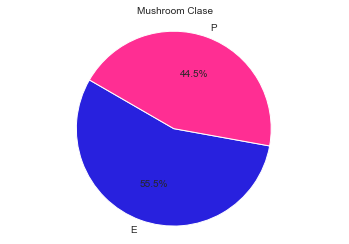

In [273]:
mush_size = data_hongo['class'].value_counts().values.tolist()
mush_types = data_hongo['class'].value_counts().axes[0].tolist()
mush_labels = 'E', 'P'
colors = ['#2821de', '#ff2e93']
plt.title('Mushroom Clase', fontsize=10)
patches, texts, autotexts = plt.pie(mush_size, labels = mush_labels, colors = colors,
        autopct='%1.1f%%',  startangle=150)
plt.axis('equal')  
plt.show()

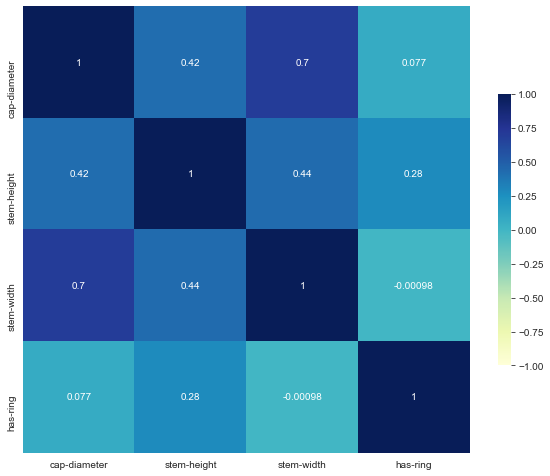

In [274]:
sb.set_style("white")
corr = data_hongo[data_hongo.columns].corr()
plt.figure(figsize=(10,10))
sb.heatmap(corr,  cmap="YlGnBu", annot=True, vmax=1,vmin = -1,center=0, square=True, cbar_kws={"shrink": 0.5});

In [275]:
data_hongo.drop(columns = 'stem-width', inplace = True)

In [276]:
data_hongo.head(3)

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-color,has-ring,habitat,season
0,p,15.26,x,o,f,w,16.95,w,1,d,w
1,p,16.60,x,o,f,w,17.99,w,1,d,u
2,p,14.07,x,o,f,w,17.80,w,1,d,w


In [277]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

longitud = len(data_hongo.dtypes.values)
for i in range(longitud):
    if data_hongo.dtypes.values[i] == 'O' and data_hongo.dtypes.index[i] != 'class':
        le.fit(data_hongo[data_hongo.dtypes.index[i]])
        data_hongo[data_hongo.dtypes.index[i]] = le.transform(data_hongo[data_hongo.dtypes.index[i]])
        
#le.inverse_transform(df['categorical_label'])

In [278]:
data_hongo.head(3)

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-color,has-ring,habitat,season
0,p,15.26,6,6,0,10,16.95,11,1,0,3
1,p,16.60,6,6,0,10,17.99,11,1,0,2
2,p,14.07,6,6,0,10,17.80,11,1,0,3


In [279]:
data_hongo['cap-shape'].value_counts()

6    26934
2    13404
5     7164
0     5694
3     3460
4     2598
1     1815
Name: cap-shape, dtype: int64

In [280]:
X = data_hongo.drop(columns=['class'])
y = data_hongo['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Para poder comprender qué ocurre con el dilema entre sesgo y varianza conforme varía k, conviene pensar en las situaciones extremas:

• De mínima, el valor de k no puede ser inferior a 1, puesto que de ser igual a 0 no habría ningún vecino contra el que comparar a los datos nuevos (tampoco tendría mucho sentido hablar de identificar los -2 vecinos más cercanos, por ejemplo). Cuando k vale 1, el modelo va a estar "pegándose" demasiado a cada punto del set de entrenamiento, lo que lleva a una pérdida considerable de generalidad. Las "islas" azules dentro del área naranja que se observan en la primera figura son una clara representación de esta situación. Por esto, solemos asociar valores demasiado bajos de k con una alta varianza del modelo.

• De máxima, k no puede ser mayor al número se samples del conjunto de entrenamiento, ya que estaríamos pidiéndole al modelo que evalúe más puntos de los que conoce. Si k = n, el modelo sólo aprende a predecir la clase mayoritaria en el training set, de ahí que en la última figura de la grilla observemos que el área azul cubre todo el gráfico. Por esto, valores demasiado altos de k suelen asociarse a un alto sesgo del modelo.
Hallar un valor adecuado de k es un aspecto crucial al momento de trabajar con KNN. Para ello, será necesario trabajar con un esquema de cross-validation que nos permita elegir un k óptimo en base a múltiples pruebas.


In [281]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 12)

k_range = list(range(1,10))
scores = []

count = 0
for i in k_range:
    count += 1
    knn = KNeighborsClassifier(n_neighbors = i)
    cv_scores = cross_val_score(knn, X_train, y_train, cv = kf)
    scores.append(np.mean(cv_scores))
    print('Restan: ' ,str(k_range[-1] - count) + ' Iteraciones', end="\r")

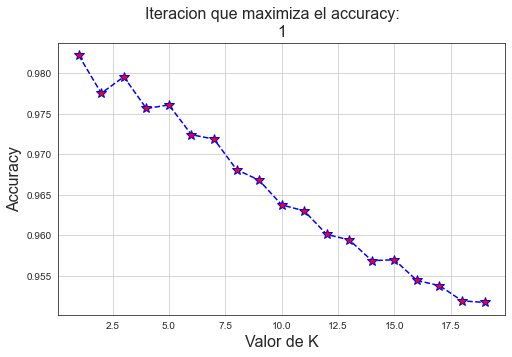

In [282]:
plt.figure(figsize = (8,5))
plt.plot(k_range, scores, color = 'blue', linestyle = 'dashed', marker = '*', markerfacecolor = 'red', markersize = 10)
plt.xlabel('Valor de K', fontsize=16); plt.ylabel('Accuracy', fontsize=16)
plt.title(k_range[np.argmax(scores)], fontsize=16)
plt.suptitle('Iteracion que maximiza el accuracy: ', fontsize=16)
plt.grid(); plt.show()

In [283]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
accuracy_score(y_train, knn.predict(X_train))

0.9909827296347241

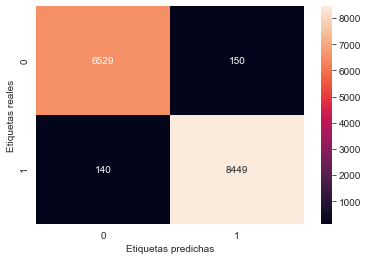

In [284]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

# Modelo Estandarizado

In [285]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [286]:
k_range = list(range(1,10))
scores = []

count = 0
for i in k_range:
    count += 1
    knn = KNeighborsClassifier(n_neighbors = i)
    cv_scores = cross_val_score(knn, X_train, y_train, cv = kf)
    scores.append(np.mean(cv_scores))
    print('Restan: ' ,str(k_range[-1] - count) + ' Iteraciones', end="\r")

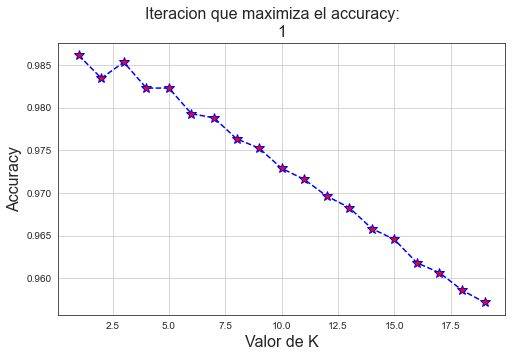

In [287]:
plt.figure(figsize = (8,5))
plt.plot(k_range, scores, color = 'blue', linestyle = 'dashed', marker = '*', markerfacecolor = 'red', markersize = 10)
plt.xlabel('Valor de K', fontsize=16); plt.ylabel('Accuracy', fontsize=16)
plt.title(k_range[np.argmax(scores)], fontsize=16)
plt.suptitle('Iteracion que maximiza el accuracy: ', fontsize=16)
plt.grid(); plt.show()